### Analysis on Clearance Time by Area

In [2]:
from pandas_profiling import ProfileReport
import pandas_profiling as pp
import pandas as pd
from functools import reduce
from datetime import date 
import matplotlib as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
%matplotlib inline

In [4]:
#Pulling in master dataframe
#drop 2019
crime_data = pd.read_csv("Resources/clean_data_with_datetime_10_18.csv")
df = pd.DataFrame(crime_data)
#df.to_csv (r'Resources/cleaned_data.csv', index = False, header=True)

In [5]:
#Convert columns to datetime
df['Occurred Date'] =pd.to_datetime(df['Occurred Date'])
df['Clearance Date'] =pd.to_datetime(df['Clearance Date'])


In [6]:
#creating function to find differnce between two dates
def numOfDays(date1, date2): 
    return (date2-date1)

In [7]:
#creating function to find differnce between two dates
df['Days to Clear Case']=numOfDays(df['Occurred Date'],df['Clearance Date'])
df['Days to Clear Case']=df['Days to Clear Case'].dt.days


In [8]:
#create group by for sectorsse
sector_grp = df.groupby(['APD Sector']).mean()
objects =sector_grp.index.tolist()
index = list(sector_grp.index) 

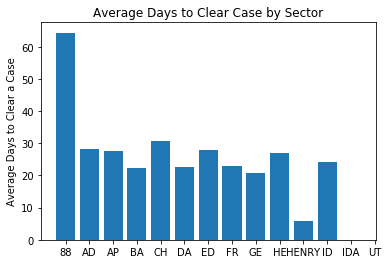

In [9]:
#Bar graph comparing each sector days to clear case
ypos = np.arange(len(objects))
plt.bar(ypos,sector_grp['Days to Clear Case'])
plt.xticks(ypos, index)
plt.ylabel('Average Days to Clear a Case')
plt.title('Average Days to Clear Case by Sector')
plt.show();

In [10]:
# through research we discover that 88 means outside of austin. IDA, UT, Henry, and 88 are removed from dataset
df=df[df['APD Sector'] != '88']
df=df[df['APD Sector'] != 'HENRY']
df=df[df['APD Sector'] != 'IDA']
df=df[df['APD Sector'] != 'UT']

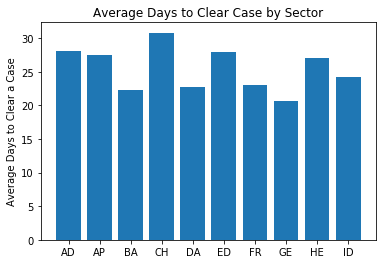

In [11]:
#create bar graph again. this time sans IDA, UT, Henry, and 88
sector_grp = df.groupby(['APD Sector']).mean()
objects =sector_grp.index.tolist()
index = list(sector_grp.index) 
ypos = np.arange(len(objects))
plt.bar(ypos,sector_grp['Days to Clear Case'])
plt.xticks(ypos, index)
plt.ylabel('Average Days to Clear a Case')
plt.title('Average Days to Clear Case by Sector')
plt.show();

In [91]:
#Average number of cases in each sector were actually cleared? 

df['Clearance Status']=df['Clearance Status'].replace(np.nan,"Not Cleared")
df.head()


,Datetime,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude,Datetime String,Days to Clear Case,Clearance Flag
0,2019-04-13,CHILD CUSTODY INTERFERE,2001,N,2019-04-13,0,RESIDENCE / HOME,9500 DESSAU RD,78753.0,4.0,ED,18.33,Not Cleared,NaT,NaN,30.352493,-97.675258,0 2019-04-13\n1 2019-04-13\n2 ...,NaN,Cleared
1,2019-04-13,RUNAWAY CHILD,4100,N,2019-04-13,23,OTHER / UNKNOWN,3708 S 2ND ST,78704.0,3.0,DA,13.07,Not Cleared,NaT,NaN,30.230056,-97.771030,0 2019-04-13\n1 2019-04-13\n2 ...,NaN,Cleared
2,2019-04-13,CRIMINAL TRESPASS,2716,N,2019-04-13,1805,DEPARTMENT / DISCOUNT STORE,1030 NORWOOD PARK BLVD,78753.0,4.0,ID,18.13,C,2019-04-13,NaN,30.339153,-97.691169,0 2019-04-13\n1 2019-04-13\n2 ...,0.0,Cleared
3,2019-04-13,POCKET PICKING,605,N,2019-04-13,100,BAR / NIGHT CLUB,403 E 6TH ST,78701.0,9.0,GE,11.00,Not Cleared,NaT,Theft,30.266787,-97.739181,0 2019-04-13\n1 2019-04-13\n2 ...,NaN,Cleared
4,2019-04-13,THEFT BY SHOPLIFTING,607,N,2019-04-13,1050,LIQUOR STORE,8311 RESEARCH BLVD SVRD NB,78758.0,4.0,ED,18.05,Not Cleared,NaT,Theft,30.356603,-97.715282,0 2019-04-13\n1 2019-04-13\n2 ...,NaN,Cleared


In [86]:
flag_grp = df.groupby(['Clearance Flag','APD Sector']).mean()
flag_grp 

Highest Offense Code  Occurred Time      Zip Code  \
Clearance Flag APD Sector                                                      
Cleared        AD                   1745.990442    1361.869410  78738.112331   
               AP                   2455.894836    1212.672446  78718.903737   
               BA                   1668.347854    1305.014467  78725.524567   
               CH                   1883.193250    1352.497831  78713.610468   
               DA                   1840.804298    1347.880367  78724.594713   
               ED                   1852.424608    1356.083699  78752.640268   
               FR                   1900.292982    1356.700143  78745.372955   
               GE                   1952.993237    1130.510505  78701.234014   
               HE                   1895.999179    1314.466056  78729.674075   
               ID                   1709.276763    1363.113633  78743.171301   

                           Council District  Census Tract   Latitude  \
Clearance Flag APD Sector                                              
Cleared        AD                  6.902037     79.793527  30.425370   
               AP                  2.000000   9800.000000  30.202544   
               BA                  8.605537      8.508243  30.307892   
               CH                  1.975843     14.842767  30.278691   
               DA                  5.545387     17.732126  30.232636   
               ED                  4.377189     18.423502  30.373646   
               FR                  3.252303     22.723041  30.182724   
               GE                  7.754821     10.720137  30.266271   
               HE                  3.804984    101.316739  30.229220   
               ID                  3.797191     17.920379  30.326746   

                           Longitude  Days to Clear Case  
Clearance Flag APD Sector                                 
Cleared        AD         -97.754753           28.130128  
               AP         -97.666875           27.507178  
               BA         -97.740950           22.245764  
               CH         -97.686509           30.809683  
               DA         -97.790785           22.771500  
               ED         -97.688293           27.886755  
               FR         -97.782361           23.083728  
               GE         -97.739089           20.616285  
               HE         -97.712714           27.004863  
               ID         -97.699431           24.173739

In [20]:
#Grouping by sector and clearance status 
status_grp = df.groupby(['Clearance Status','APD Sector']).mean()
status_grp

Highest Offense Code  Occurred Time  \
Clearance Status APD Sector                                        
C                AD                   1878.400438    1317.114599   
                 AP                   2156.076812    1202.523188   
                 BA                   2162.823995    1210.327176   
                 CH                   2088.487251    1363.548525   
                 DA                   1959.637465    1306.033728   
                 ED                   1959.782272    1334.934533   
                 FR                   1908.200257    1285.732764   
                 GE                   2315.409839    1101.160976   
                 HE                   2088.414102    1287.094928   
                 ID                   1843.254140    1346.531500   
N                AD                   1585.255880    1366.706090   
                 AP                   2617.691996    1191.711246   
                 BA                   1372.243076    1337.673010   
                 CH                   1655.992517    1345.580120   
                 DA                   1657.524070    1384.109738   
                 ED                   1662.615333    1363.854889   
                 FR                   1735.070232    1363.150545   
                 GE                   1365.596235    1151.692883   
                 HE                   1665.434646    1336.752700   
                 ID                   1493.989646    1360.898570   
O                AD                   1599.494618    1351.570477   
                 AP                   1698.110368    1254.031773   
                 BA                   1455.122683    1279.157988   
                 CH                   1356.386544    1334.144170   
                 DA                   1347.830729    1323.917318   
                 ED                   1502.283736    1338.156200   
                 FR                   1319.471056    1364.795846   
                 GE                   1378.776709    1124.085470   
                 HE                   1369.369053    1286.565593   
                 ID                   1352.338004    1357.798599   

                                 Zip Code  Council District  Census Tract  \
Clearance Status APD Sector                                                 
C                AD          78729.984894          6.917838     83.700485   
                 AP          78718.406977          2.000000   9800.000000   
                 BA          78719.604497          8.227153      8.473258   
                 CH          78711.774681          2.075914     13.866363   
                 DA          78723.242470          5.474999     18.085282   
                 ED          78752.816310          4.487357     18.443461   
                 FR          78745.092475          3.134156     22.961332   
                 GE          78701.207583          7.904992     10.753289   
                 HE          78732.487223          3.972537    125.456284   
                 ID          78744.286282          3.809460     18.001180   
N                AD          78740.097743          6.912605     77.550225   
                 AP          78719.000000          2.000000   9800.000000   
                 BA          78727.948862          8.789071      8.446913   
                 CH          78714.395161          1.960977     15.145841   
                 DA          78724.980158          5.567841     17.566779   
                 ED          78752.432824          4.360862     18.391833   
                 FR          78745.442717          3.292282     22.686146   
                 GE          78701.268505          7.592975     10.688334   
                 HE          78728.257551          3.749570     80.205363   
                 ID          78743.097992          3.856950     17.813308   
O                AD          78741.160164          6.776181     84.971032   
                 AP          78718.829431          2.000000   9800.000000   
    

In [22]:
#c,n,o dataframes for plotting
c_df = status_grp.drop(['O', 'N'])
n_df= status_grp.drop(['C', 'O'])
o_df= status_grp.drop(['C', 'N'])

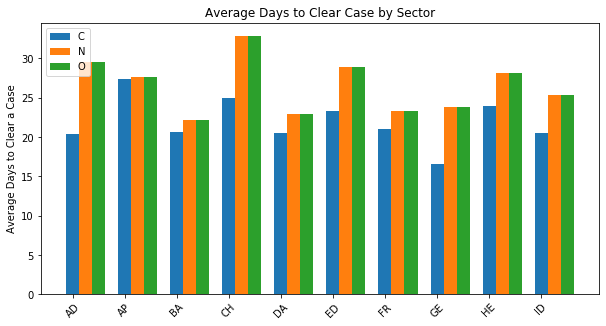

In [57]:
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))
objects =c_df.index.tolist()
index = list(n_df.index) 
index =pd.DataFrame(index)
ypos = np.arange(len(objects))

plt.bar(ypos,c_df ['Days to Clear Case'],width,label ='C')

plt.ylabel('Average Days to Clear a Case')
plt.title('Average Days to Clear Case by Sector')

plt.bar([p + width for p in ypos],n_df ['Days to Clear Case'],width)
plt.xticks(ypos, index[1], rotation=45)
plt.bar([p + width*2 for p in ypos],n_df ['Days to Clear Case'],width)

plt.legend(['C', 'N', 'O'], loc='upper left')
